In [2]:
import numpy as np

# Task 1: a)

Robot 1: Stanford

In [19]:
n = 3

def inverse_kinematics_stanford(endeffector_position,lengthsoflinks): #from repository
    theta1 = np.arctan(endeffector_position[1]/endeffector_position[0])
    r = np.sqrt(endeffector_position[0]**2 + endeffector_position[1]**2)
    s = endeffector_position[2] - lengthsoflinks[0]
    theta2 = np.arctan(s/r)
    d3 = np.sqrt(r**2 + s**2) - lengthsoflinks[1]
    
    DH1 = [[0,-np.pi/2,0,theta1],[lengthsoflinks[1],np.pi/2,0,theta2],[d3,0,0,0]]
    DH2 = [[0,-np.pi/2,0,theta1+np.pi],[lengthsoflinks[1],np.pi/2,0,np.pi-theta2],[d3,0,0,0]]

    return DH1,DH2

def dhpara(n,DH,t=[0]*n):
  
  a = [0]*(n+1)
  alpha = [0]*(n+1)
  d = [0]*(n+1)
  theta = [0]*(n+1)
  for i in range(1,n+1):
    a[i] = DH[i-1][0]
    alpha[i] = DH[i-1][1]
    d[i] = DH[i-1][2]
    theta[i] = DH[i-1][3]
  
  A = [0]*(n+1)
  for i in range(1,n+1):
    A[i] = [[np.cos(theta[i]),-np.sin(theta[i])*np.cos(alpha[i]),np.sin(theta[i])*np.sin(alpha[i]),a[i]*np.cos(theta[i])],[np.sin(theta[i]),np.cos(theta[i])*np.cos(alpha[i]),-np.cos(theta[i])*np.sin(alpha[i]),a[i]*np.sin(theta[i])],[0,np.sin(alpha[i]),np.cos(alpha[i]),d[i]],[0,0,0,1]]

  T = [0]*(n+1)#intermediate transformation matrices

  #for the final transformation matrix, we multiply all the matrices
  T[1] = A[1]
  T_final = np.matmul(A[1],A[2])
  T[2] = T_final
  for i in range(3,n+1):
    T_final = np.matmul(T_final,A[i]) 
    T[i] = T_final

  #the final transformation matrix is stored in T_final
  pn = [0,0,d[n],1]
  po = np.matmul(T_final,pn)

  #end effector position:
  po = [po[0],po[1],po[2]]
  return po

#point A
print('Point A')
#inverse kinematics
[DH1,DH2] = inverse_kinematics_stanford([0.45,0.0075,0.1],[0.25,0.25])
#forward kinematics
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point B
print('\nPoint B')
[DH1,DH2] = inverse_kinematics_stanford([0.45,-0.0075,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point C
print('\nPoint C')
[DH1,DH2] = inverse_kinematics_stanford([0.25,-0.0075,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point D
print('\nPoint D')
[DH1,DH2] = inverse_kinematics_stanford([0.25,0.0075,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

Point A
[0.45000000000000007, 0.00749999999999999, 0.14999999999999997]
[0.45000000000000007, 0.007499999999999878, 0.1499999999999999]

Point B
[0.45000000000000007, -0.00750000000000001, 0.14999999999999997]
[0.45000000000000007, -0.0074999999999999685, 0.1499999999999999]

Point C
[0.24999999999999997, -0.007500000000000008, 0.15]
[0.24999999999999997, -0.007500000000000019, 0.15]

Point D
[0.24999999999999997, 0.00749999999999999, 0.15]
[0.24999999999999997, 0.0074999999999999754, 0.15]


Robot 2: PUMA

In [20]:
def inv_kin_puma(x,y,z,d1,a2,a3):
  theta1 = np.arctan(y/x)

  R = (x**2+y**2+z**2)**0.5
  r = (x**2+y**2)**0.5

  sin_alpha = -z/R
  cos_alpha = -r/R
  cos_beta = (a2**2+R**2-a3**2)/(2*a2*R)
  sin_beta = (1-cos_beta**2)**0.5

  sin_theta2 = sin_alpha*cos_beta + sin_beta*cos_alpha
  cos_theta2 = cos_alpha*cos_beta - sin_beta*sin_alpha

  theta2 = np.arctan(cos_theta2/sin_theta2)

  cos_theta3 = (a2**2+a3**2-R**2)/(2*a2*a3)
  sin_theta3 = (1-cos_theta3**2)**0.5

  theta3 = np.arctan(cos_theta3/sin_theta3)

  DH = [[0,-np.pi/2,d1,theta1],[a2,0,0,theta2],[a3,0,0,theta3]]

  return DH

#point A
print('Point A')
DH = inv_kin_puma(0.45,0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point B
print('\nPoint B')
DH = inv_kin_puma(0.45,-0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point C
print('\nPoint C')
DH = inv_kin_puma(0.25,-0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point D
print('\nPoint D')
DH = inv_kin_puma(0.25,0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

Point A
[0.390411299701462, 0.00650685499502438, 0.0015058100057764173]

Point B
[0.390411299701462, -0.00650685499502435, 0.0015058100057764173]

Point C
[0.4486147443545856, -0.013458442330637557, 0.05756764835272568]

Point D
[0.4486147443545856, 0.013458442330637579, 0.05756764835272568]


In [5]:
#Test point for different link lengths
print('Test Point')
DH = inv_kin_puma(0.25,0.0075,0.1,0.4,0.4,0.4)
print(dhpara(3,DH,[0,0,0]))

Test Point
[0.6643124690140456, 0.019929374070421384, 0.11504456273523939]


In [6]:
def inverse_kinematics(l1,l2,l3,xc,yc,zc): #from repository
  theta1 = np.arctan(yc/xc)
  D = (xc*xc+yc*yc+(zc-l1)*(zc-l1)-l2*l2-l3*l3)/(2*l2*l3)
  if D>=1 or D<=-1:
      print("singular configuration")
  if D>1 or D<-1:
      print("outside workspace")
  theta3 = np.arctan((-(1-D*D)**0.5)/D)
  theta2 = np.arctan((l1-zc)/((xc*xc+yc*yc)**0.5))-np.arctan((l3*np.sin(theta3))/(l2+l3*np.cos(theta3)))

  DH = [[0,-np.pi/2,l1,theta1],[l2,0,0,theta2],[l3,0,0,theta3]]

  return DH

#point A
print('Point A')
DH = inverse_kinematics(0.45,0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point B
print('\nPoint B')
DH = inverse_kinematics(0.45,-0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point C
print('\nPoint C')
DH = inverse_kinematics(0.25,-0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point D
print('\nPoint D')
DH = inverse_kinematics(0.25,0.0075,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

Point A
singular configuration
outside workspace
[(0.2500000000000284-7.105427357601002e-14j), (0.25-8.526512829121202e-14j), (0.25+8.526512829121202e-14j)]

Point B
singular configuration
outside workspace
[(-8.526512829121202e-14-0.2342682837856387j), (-9.947598300641403e-14-0.2342682837856671j), (0.4500000000000455+0.18741462702851663j)]

Point C
singular configuration
outside workspace
[(-4.5110079911870815e-14-0.22900600428805262j), (-4.511007991188051e-14-0.22900600428808104j), (0.24999999999997158-3.190255011607686e-17j)]

Point D
singular configuration
outside workspace
[(0.25-4.1321916614925434e-14j), (0.2499999999999858-4.1321916614925434e-14j), (0.25+0j)]


In [7]:
#Test point for different link lengths
print('Test Point')
DH = inverse_kinematics(0.45,0.0075,0.1,0.55,0.55,0.55)
print(dhpara(3,DH,[0,0,0]))

Test Point
singular configuration
outside workspace
[(0.5499999999967713-2.7284841053187847e-12j), (0.5499999999965439-2.7000623958883807e-12j), (0.5499999999994429-4.547473508864641e-13j)]


Robot 3: SCARA 

In [8]:
def scara_invkin(x,y,z,d1,d2): #from repository
  # using formulae from the textbook
  r = abs((x**2+y**2-d1**2-d2**2)/(2*d1*d2))
  theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
  theta1 = np.arctan(y/x) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
  d3 = -z
  
  DH = [[d1,0,0,theta1],[d2,np.pi,0,theta2],[0,0,d3,0]]
  return DH

#point A
print('Point A')
DH = scara_invkin(0.45,0.0075,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point B
print('\nPoint B')
DH = scara_invkin(0.45,-0.0075,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point C
print('\nPoint C')
DH = scara_invkin(0.25,-0.0075,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point D
print('\nPoint D')
DH = scara_invkin(0.25,0.0075,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

Point A
[0.45, 0.007499999999999988, 0.2]

Point B
[0.45000000000000007, -0.00749999999999997, 0.2]

Point C
[0.43275305003883435, -0.01298259150116502, 0.2]

Point D
[0.43275305003883435, 0.01298259150116502, 0.2]


In [9]:
#Test point for different link lengths
print('Test Point')
DH = scara_invkin(0.25,0.0075,0.1,0.55,0.55)
print(dhpara(3,DH,[0,0,1]))

Test Point
[1.0707062992336898, 0.03212118897701072, 0.2]


# Task 1: b)

In [10]:
#for the r value, enter 1 for Stanford manipulator, 2 for PUMA manipulator and 3 for SCARA manipulator
def manifold(r,x,y,z):
  if r==1:
    [DH,DH2] = inverse_kinematics_stanford([x,y,z],[0.25,0.25])
    print(DH)
    print(DH2)
    t = [0,0,1]

  if r==2:
    DH = inv_kin_puma(x,y,z,0.25,0.25,0.25)
    print(DH)
    t = [0,0,0]
    
  if r==3:
    DH = scara_invkin(x,y,z,0.25,0.25)
    print(DH)
    t = [0,0,1]

  return DH,t

print('Stanford Manipulator')
[DH,t] = manifold(1,0.4,0.0075,0.1)
print(dhpara(3,DH,t))

print('\nPUMA Manipulator')
[DH,t] = manifold(2,0.4,0.0075,0.1)
print(dhpara(3,DH,t))

print('\nSCARA Manipulator')
[DH,t] = manifold(3,0.4,0.0075,0.1)
print(dhpara(3,DH,t))

Stanford Manipulator
[[0, -1.5707963267948966, 0, 0.01874780319774436], [0.25, 1.5707963267948966, 0, -0.3587128931563738], [0.17726601783900392, 0, 0, 0]]
[[0, -1.5707963267948966, 0, 3.1603404567875373], [0.25, 1.5707963267948966, 0, 3.500305546746167], [0.17726601783900392, 0, 0, 0]]
[0.4, 0.007499999999999991, 0.14999999999999997]

PUMA Manipulator
[[0, -1.5707963267948966, 0.25, 0.01874780319774436], [0.25, 0, 0, 0.724835989150413], [0.25, 0, 0, -0.36875027812127925]]
[0.4213951148672273, 0.007901158403760527, -0.0029052112561576277]

SCARA Manipulator
[[0.25, 0, 0, -0.6245189145630348], [0.25, 3.141592653589793, 0, 1.2865334355215583], [0, 0, -0.1, 0]]
[0.4, 0.007499999999999998, 0.2]


# Task 1: c)

Robot 1: Stanford

In [12]:
#point A
print('Point A')
[DH1,DH2] = inverse_kinematics_stanford([0.40,0.006,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point B
print('\nPoint B')
[DH1,DH2] = inverse_kinematics_stanford([0.40,0.001,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point C
print('\nPoint C')
[DH1,DH2] = inverse_kinematics_stanford([0.35,0.001,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

#point D
print('\nPoint D')
[DH1,DH2] = inverse_kinematics_stanford([0.35,0.006,0.1],[0.25,0.25])
print(dhpara(3,DH1,[0,0,1]))
print(dhpara(3,DH2,[0,0,1]))

Point A
[0.4000000000000001, 0.0059999999999999915, 0.15000000000000002]
[0.4000000000000001, 0.005999999999999878, 0.1499999999999999]

Point B
[0.4, 0.0009999999999999907, 0.14999999999999997]
[0.4, 0.000999999999999948, 0.14999999999999997]

Point C
[0.35, 0.000999999999999991, 0.14999999999999997]
[0.35000000000000003, 0.0009999999999999545, 0.14999999999999986]

Point D
[0.35, 0.0059999999999999915, 0.15]
[0.35000000000000003, 0.006000000000000028, 0.1499999999999999]


Robot 2: PUMA

In [13]:
#point A
print('Point A')
DH = inv_kin_puma(0.40,0.006,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point B
print('\nPoint B')
DH = inv_kin_puma(0.40,0.001,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point C
print('\nPoint C')
DH = inv_kin_puma(0.35,0.001,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

#point D
print('\nPoint D')
DH = inv_kin_puma(0.35,0.006,0.1,0.25,0.25,0.25)
print(dhpara(3,DH,[0,0,0]))

Point A
[0.42143236107254306, 0.00632148541608816, -0.0029030327809374534]

Point B
[0.42149674543638094, 0.0010537418635909678, -0.002899259063341611]

Point C
[0.43687963355069637, 0.001248227524430576, 0.007287485409136499]

Point D
[0.43680623597523616, 0.007488106902432635, 0.007272027792217514]


Robot 3: SCARA

In [14]:
#point A
print('Point A')
DH = scara_invkin(0.40,0.006,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point B
print('\nPoint B')
DH = scara_invkin(0.40,0.001,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point C
print('\nPoint C')
DH = scara_invkin(0.35,0.001,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

#point D
print('\nPoint D')
DH = scara_invkin(0.35,0.006,0.1,0.25,0.25)
print(dhpara(3,DH,[0,0,1]))

Point A
[0.4, 0.005999999999999997, 0.2]

Point B
[0.4, 0.000999999999999965, 0.2]

Point C
[0.35706856372457807, 0.001020195896355925, 0.2]

Point D
[0.35696855911537284, 0.006119461013406397, 0.2]


# Task 4: b)

In [18]:
def inverse_dynamics(kx,ky,m,l,q,qdot,qddot):

  g = 9.8 #acceleration due to gravity in m/s^2
  [xo,yo] = [2.5,4.33] #mean position

  tau = (m*l**2*qddot + m*g*l) + ky*(l*np.sin(q)-yo)*l*np.cos(q) - kx*(l*np.cos(q)-xo)*l*np.sin(q)

  return tau

print('The tau value for the given parameters is')
inverse_dynamics(10,5,5,5,np.pi/4,np.pi/8,np.pi/4)

The tau value for the given parameters is


292.51880900955564

# Task 3: b)

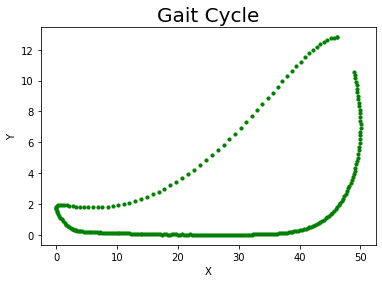

In [17]:
import xlrd
import matplotlib.pyplot as plt

loc = ("Gait_DATA.xlsx")
 
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

X = []
Y = []
for i in range(1,sheet.nrows):
  X.append(sheet.cell_value(i,0))
  Y.append(sheet.cell_value(i,1))

plt.scatter(X, Y, color = 'g',s = 10)
plt.title('Gait Cycle', fontsize = 20)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()